In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import numpy as np
import scipy.stats as stats
import math
import csv
from scipy.stats import norm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

def extract_rewards():
    # load real-time reward csv file
    reward_history = []
    with open('reward_history.csv', newline='') as csv_file:
        reward_reader = csv.reader(csv_file, delimiter=',')
        for row in reward_reader:
            reward_history.append(float(row[0]))

    return reward_history


In [2]:
def plot_kde_estimate(x, y, y_pred, mean, sigma, iter_num=None, save_plot=False):
    y_n = stats.norm.pdf(x, mean, sigma)
    y_n = y_n / sum(y_n)
    # figure properties
    fig, ax = plt.subplots(figsize=(4, 2))
    plt.rcParams['text.usetex'] = True
    plt.fill_between(x, y_pred, alpha=0.5)
    plt.plot(y, np.full_like(y, -0.0025), 'ok', markersize=3.5, alpha=0.5)
    plt.fill_between(x, y_n, alpha=0.5)

    # additional properties
    plt.xlabel(r'$\mathcal{R}(\mathbf{x})$', fontsize=24)
    plt.rcParams['axes.linewidth'] = 1.25
    plt.xticks(fontsize=24)
    plt.yticks([], fontsize=18)

    if save_plot:
        # save plot as pdf
        plt.savefig('figures/plot_kde_estimate_{}.pdf'.format(iter_num),
                    format='pdf', bbox_inches='tight', dpi=1200)

    plt.show()


# data 
reward_vals = extract_rewards()   # extract reward from saved files

s_val = np.load('stored_artifacts.npy').tolist()

unique_states = []
rewards = []

for i in range(len(s_val)):
    if s_val[i] not in unique_states:
        unique_states.append(s_val[i])
        rewards.append([reward_vals[i]])

    else:
        idx = unique_states.index(s_val[i])
        rewards[idx].append(reward_vals[i])
        

In [3]:
# y_d = np.array(rewards[1])

# x_d = np.linspace(min(y_d) - 1.0, max(y_d) + 1.0, 100)
# bandwidths = 10 ** np.linspace(-1, 1, 100)
# grid = GridSearchCV(KernelDensity(kernel='gaussian'),
#                     {'bandwidth': bandwidths},
#                     cv=LeaveOneOut())
# grid.fit(x_d[:, None])
# b = grid.best_params_['bandwidth']
# kde = KernelDensity(bandwidth=b, kernel='gaussian')
# kde.fit(y_d[:, None])
# # score_samples returns the log of the probability density
# logprob = kde.score_samples(x_d[:, None])
# y = np.exp(logprob)
# y = y / sum(y)
# prod = y*x_d
# mean = sum(prod)
# var = sum(x_d**2*y) - mean**2
# sigma = np.sqrt(var)

# plot_kde_estimate(x_d, y_d, y, mean, sigma)

In [21]:

def plot_kde_estimate(rewards_cache, rewards_pred, rewards_kde_mean,rewards_kde_std, 
                      iter_num=None, save_plot=False):

    rows = (len(rewards_kde_mean)//2) + 1
    
    f = plt.figure(figsize=(10,16))
    
    for k in range(len(rewards_kde_mean)):
        y = np.array(rewards_cache[k])
        x = np.linspace(min(y) - 1.0, max(y) + 1.0, 100)
        y_n = stats.norm.pdf(x, rewards_kde_mean[k], rewards_kde_std[k])
        y_n = y_n / sum(y_n)

        
        # figure properties
        ax = f.add_subplot(rows, 2, k+1)
        plt.rcParams['text.usetex'] = True
        plt.fill_between(x, rewards_pred[k], alpha=0.5)
        plt.plot(y, np.full_like(y, -0.0025), 'ok', markersize=3.5, alpha=0.5)
        plt.fill_between(x, y_n, alpha=0.5)

        # additional properties
        plt.xlabel(r'$\mathcal{R}(\mathbf{x})$', fontsize=24)
        plt.rcParams['axes.linewidth'] = 1.25
        plt.xticks(fontsize=14)
        plt.yticks([], fontsize=14)
    
    if save_plot:
        # save plot as pdf
        if iter_num:
            plt.savefig('figures/plot_kde_estimate_{}.pdf'.format(iter_num))
               
    

# def get_KDE_estimate(unique_artifacts, rewards_cache):

#     rewards_kde_mean = []
#     rewards_kde_std = []
#     rewards_pred = []


#     for k in range(len(rewards_cache)):
#         #
#         print(f'iter#{k}')
#         #
#         y = np.array(rewards_cache[k])
#         x = np.linspace(min(y) - 1.0, max(y) + 1.0, 100)

#         bandwidths = 10 ** np.linspace(-1, 1, 100)   # for cross validation of the hyperparameter
#         grid = GridSearchCV(KernelDensity(kernel='gaussian'),
#                             {'bandwidth': bandwidths},
#                             cv=LeaveOneOut())
#         grid.fit(x[:, None])
#         b = grid.best_params_['bandwidth']
#         kde = KernelDensity(bandwidth=b, kernel='gaussian')
#         kde.fit(y[:, None])

#         # score_samples returns the log of the probability density
#         logprob = kde.score_samples(x[:, None])
#         y_pred = np.exp(logprob)
#         y_pred = y_pred / sum(y_pred)
#         prod = y_pred * x
#         mean = sum(prod)
#         var = sum(x ** 2 * y_pred) - mean ** 2
#         sigma = np.sqrt(var)
#         # plot kde estimate
#         rewards_kde_mean.append(mean)
#         rewards_kde_std.append(sigma)
#         rewards_pred.append(y_pred)
#     dataset = [unique_artifacts, rewards_kde_mean]
    
#     plot_kde_estimate(rewards_cache, rewards_pred, rewards_kde_mean, 
#                       rewards_kde_std, iter_num=None, save_plot=False)
        
#     return dataset, rewards_pred, rewards_kde_var, rewards_kde_std



iter#0
iter#1
iter#2
iter#3
iter#4
iter#5
iter#6
iter#7
iter#8
iter#9


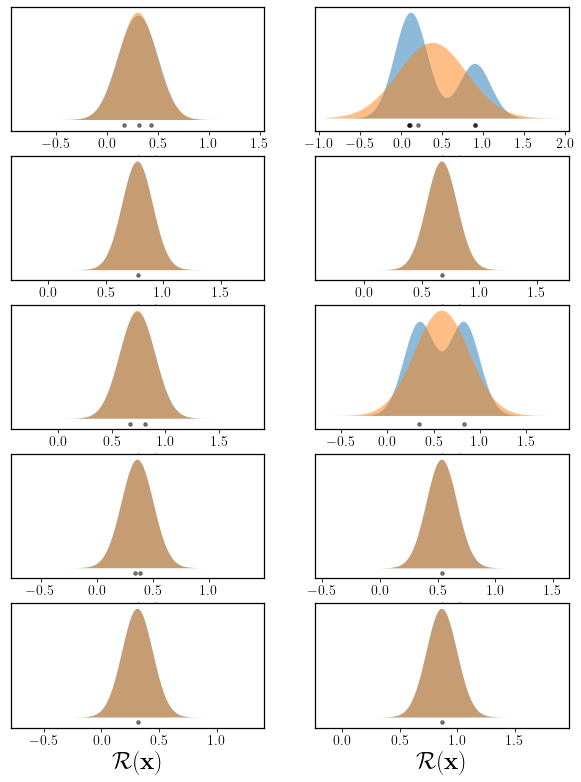

In [22]:
unique_artifacts = [[400, 500], 
         [300, 350], 
         [500, 600],
         [300,  700],
         [200, 800],
         [100, 700],
         [500, 400],
         [200, 800],
         [290, 504], 
         [209, 409]]

rewards_cache = rewards

# dataset, rewards_kde_var = get_KDE_estimate(states, rewards_cache)

# ------------ test code ------------------
rewards_kde_mean = []
rewards_kde_std = []
rewards_pred = []


for k in range(len(rewards_cache)):
    #
    print(f'iter#{k}')
    #
    y = np.array(rewards_cache[k])
    x = np.linspace(min(y) - 1.0, max(y) + 1.0, 100)

    bandwidths = 10 ** np.linspace(-1, 1, 100)   # for cross validation of the hyperparameter
    grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                        {'bandwidth': bandwidths},
                        cv=LeaveOneOut())
    grid.fit(x[:, None])
    b = grid.best_params_['bandwidth']
    kde = KernelDensity(bandwidth=b, kernel='gaussian')
    kde.fit(y[:, None])

    # score_samples returns the log of the probability density
    logprob = kde.score_samples(x[:, None])
    y_pred = np.exp(logprob)
    y_pred = y_pred / sum(y_pred)
    prod = y_pred * x
    mean = sum(prod)
    var = sum(x ** 2 * y_pred) - mean ** 2
    sigma = np.sqrt(var)
    # plot kde estimate
    rewards_kde_mean.append(mean)
    rewards_kde_std.append(sigma)
    rewards_pred.append(y_pred)
dataset = [unique_artifacts, rewards_kde_mean]

plot_kde_estimate(rewards_cache, rewards_pred, rewards_kde_mean, 
                  rewards_kde_std, iter_num=None, save_plot=False)